Important relations among different columns in the dataframe above:
    
#### These relations are analyzed regardless of the existing rate at the country level (everything will be examined globally)"
- distribution of suicide between different age range for males in different years 
- compare this distribution with that of women 
- how HDI (Human Development Index) can affect the suicide rate?

    `Make inference`

#### These relations are analyzed at the country level"

- which countries show more suicide rate among different genders?
    
    `Requires another CSV file to be downloaded`

- barplot for countries cmparing the rate between the youngest and oldest age range 



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('./master.csv')


print('Total number of features: ', len(df.columns))
df=df.rename(columns={"suicides/100k pop": "suicides_per_100k"})
df=df.rename(columns={"gdp_per_capita ($)": "gdp_per_capita"})
df=df.rename(columns={" gdp_for_year ($) ": "gdp_for_year"})
df = df.drop(['HDI for year'],  axis=1)
df = df.drop(['generation'],  axis=1)
a=list(df.columns)
print(a)


Total number of features:  12
['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides_per_100k', 'country-year', 'gdp_for_year', 'gdp_per_capita']


In [6]:
country_list=np.unique(df['country'])
year_list=list(np.unique(df['year']))

year_list.remove(1985)
year_list.remove(1986)
year_list.remove(2016)

country_num=len(country_list)
print(country_list)
print(country_num)
print(year_list)

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

In [74]:
df_c = df[df['country'] == 'Puerto Rico']

df_y = df_c[df_c['year'] == 2000]
df_y_p=list(df_y['population'])
df_y_s=list(df_y['suicides_no'])
df_y_f=list(df_y['gdp_for_year'])

df_c.head(40)
sum(df_y_p)

3511947

In [60]:
def suicide_country_factor(df,facto):
    
    country_list=np.unique(df['country'])
    country_num=len(country_list)
    
    pear=[]
    
    for co in country_list:
        
        df_c = df[df['country'] == co]
       
        dff_facto=[]
        dff_sui=[]
        
        for year in year_list:
            
            df_y = df_c[df_c['year'] == year]
            df_y_s=list(df_y['suicides_no'])
            n=sum(df_y_s)
            
            dff_sui.append(n)
            
            df_y_f=list(df_y[facto])
            df_y_f_int=[]
            
            
            if facto == 'gdp_for_year':
                for ele in df_y_f:
                    ele_int=int(ele.replace(',',''))
                    df_y_f_int.append(ele_int)
            else:
                df_y_f_int=df_y_f
            
            
            nn=sum(df_y_f_int)

            
            
            dff_facto.append(nn)            
  
        

        
        cor=np.corrcoef(dff_sui,dff_facto)
        pear.append(cor[1][0])

    return pear

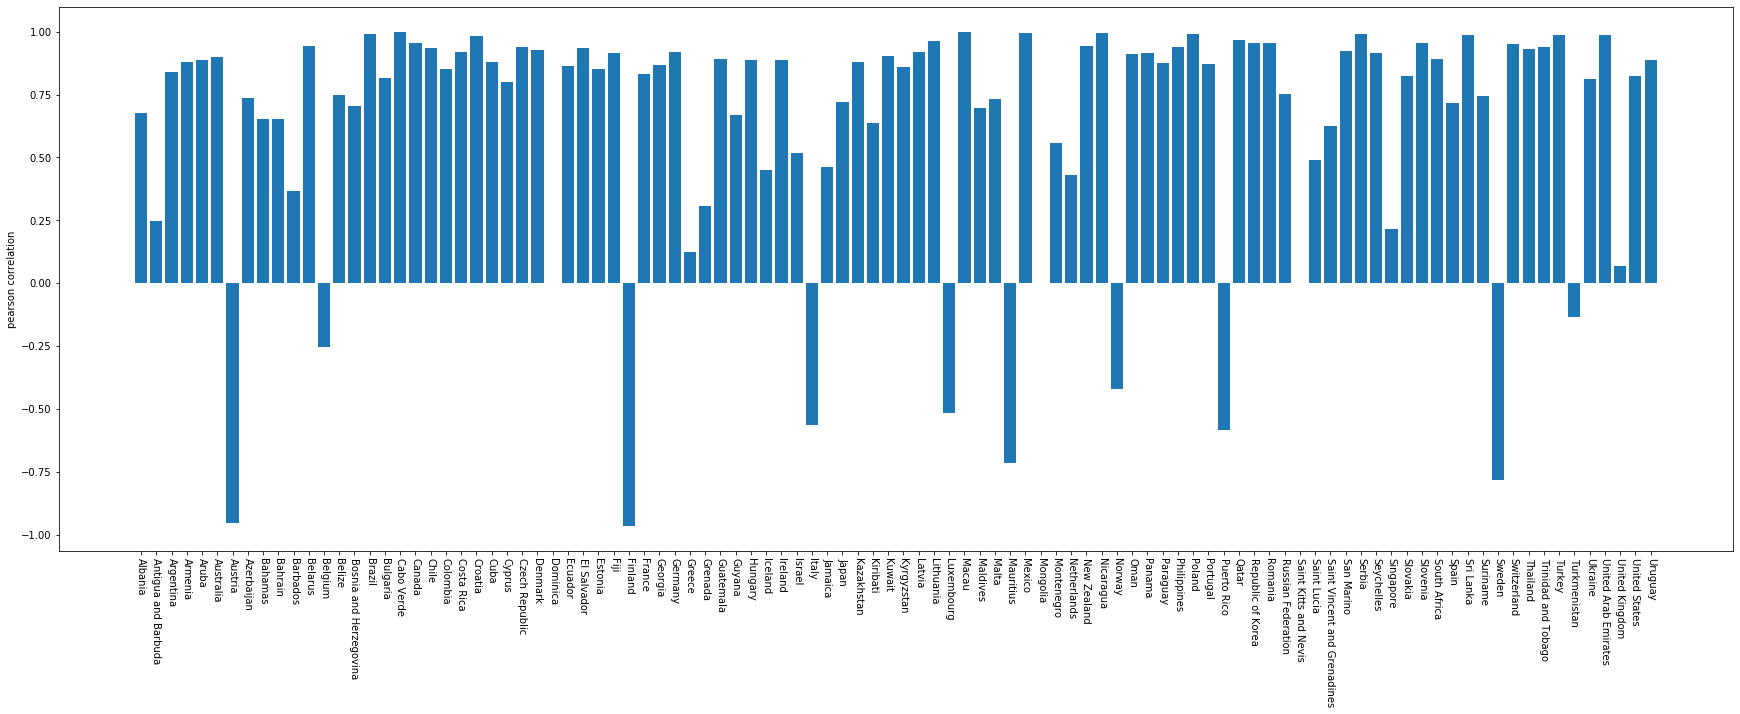

In [61]:
facto='population'
pear=suicide_country_factor(df,facto)
fig = plt.figure(figsize=(30,10))

plt.bar(country_list[0:100],pear[0:100])
plt.ylabel('pearson correlation')
plt.xticks(rotation=270);

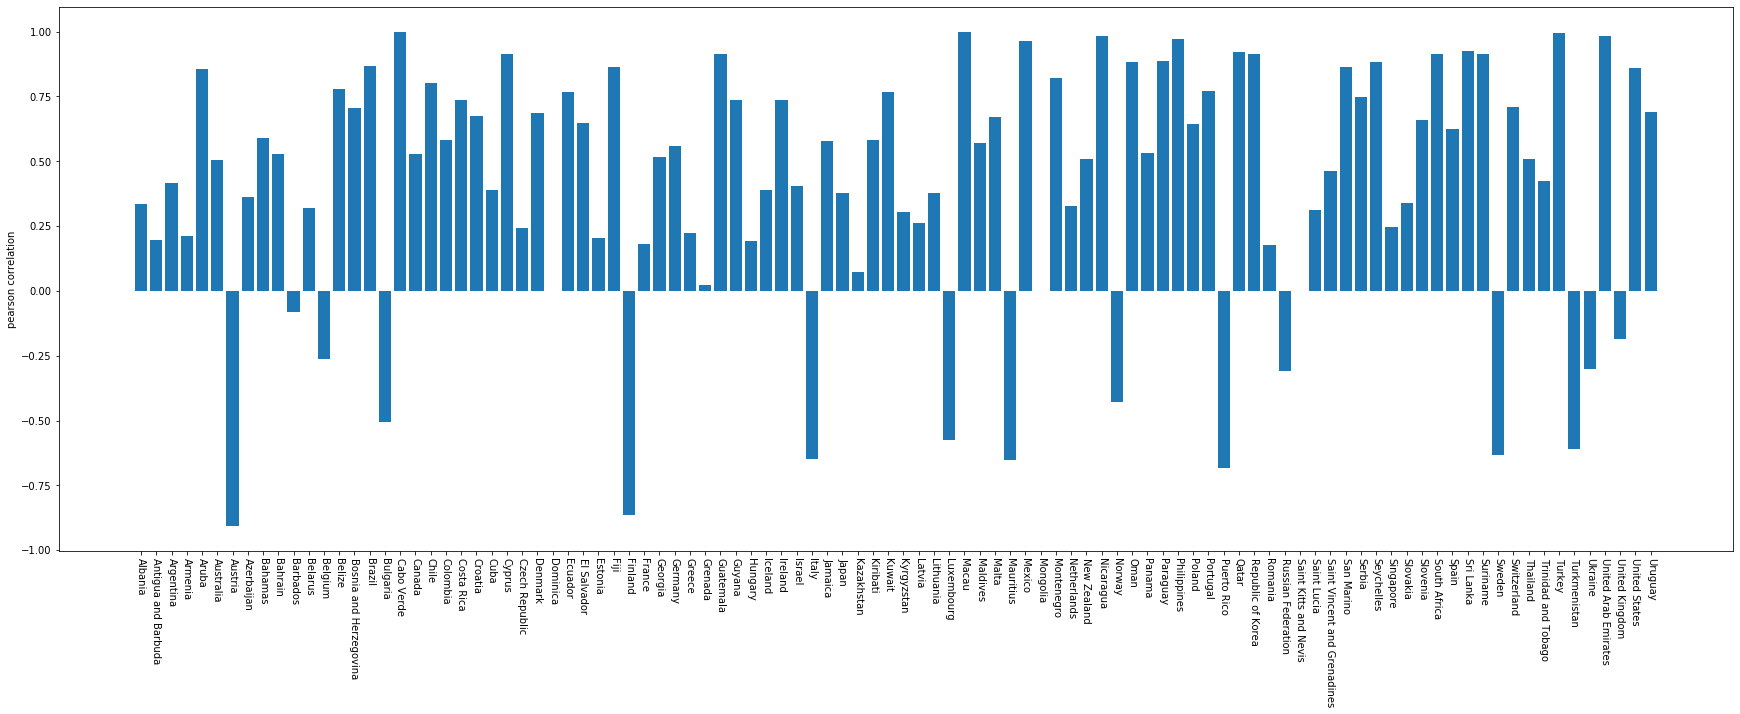

In [62]:
facto='gdp_for_year'
pear=suicide_country_factor(df,facto)
fig = plt.figure(figsize=(30,10))

plt.bar(country_list[0:100],pear[0:100])
plt.ylabel('pearson correlation')
plt.xticks(rotation=270);

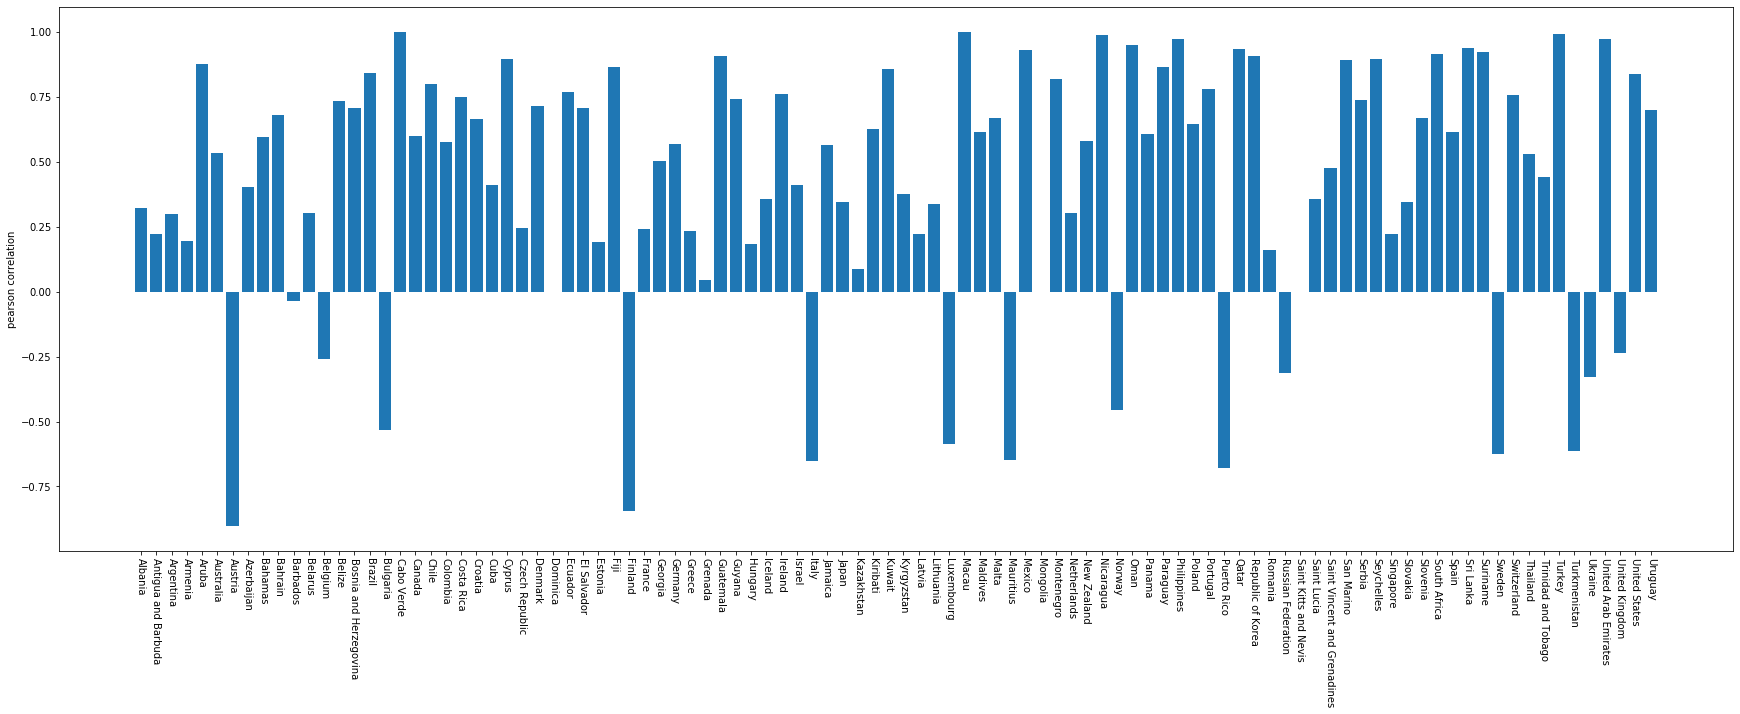

In [63]:
facto='gdp_per_capita'
pear=suicide_country_factor(df,facto)
fig = plt.figure(figsize=(30,10))

plt.bar(country_list[0:100],pear[0:100])
plt.ylabel('pearson correlation')
plt.xticks(rotation=270);